1.	Обучите любую модель классификации на датасете IRIS до применения PCA и после него. Сравните качество классификации по отложенной выборке.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
# Загрузим игрушечный датасет из sklearn
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [5]:
# масштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрируем — вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# делим каждое значение на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

Разделим выборку на обучающую и тестовую

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

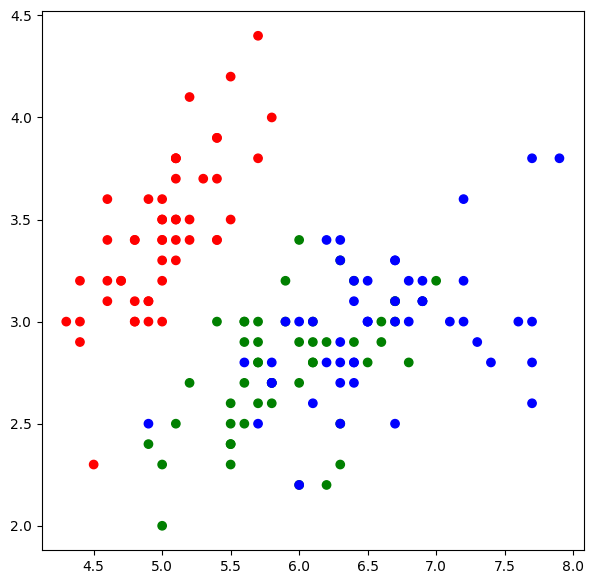

In [7]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [8]:
# функция вычисления расстояния по Евклииду
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [9]:
# алгоритм поиска k ближайших соседей
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [10]:
# функциz для вычисления точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [11]:
# работа алгоритма при различных k
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 1.000


In [12]:
# график распределения классов
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

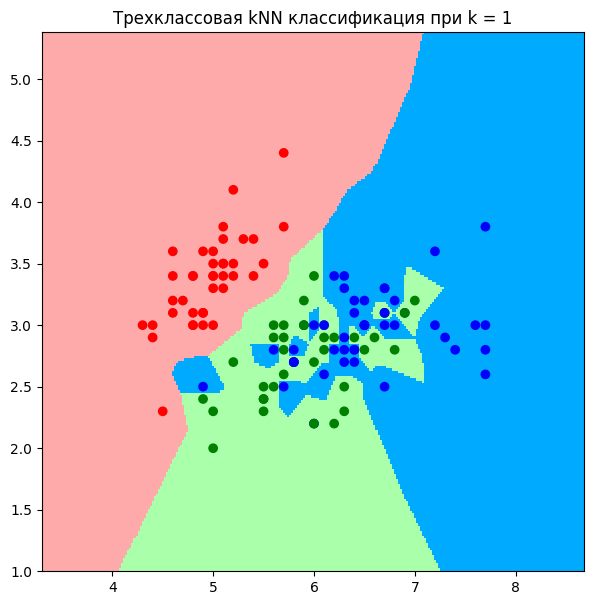

In [13]:
get_graph(X_train, y_train, k)

In [14]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 1.000


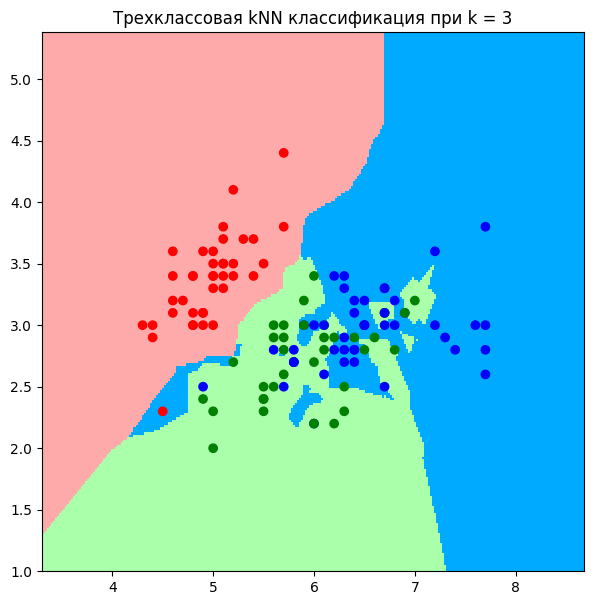

In [15]:
get_graph(X_train, y_train, k)

In [16]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 1.000


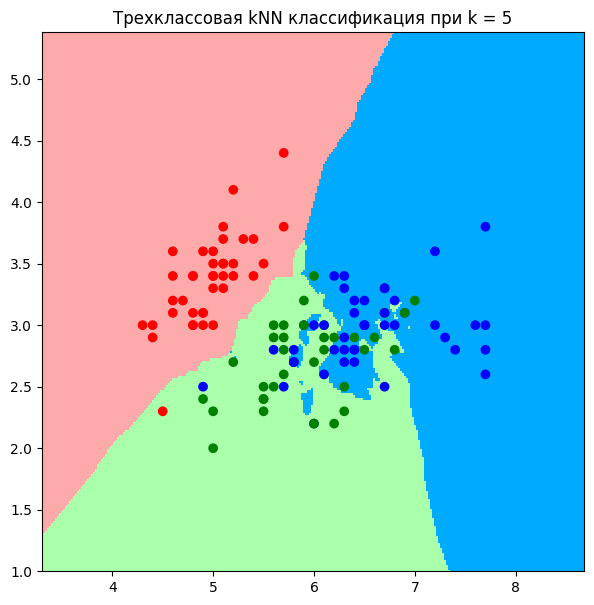

In [17]:
get_graph(X_train, y_train, k)

In [18]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.967


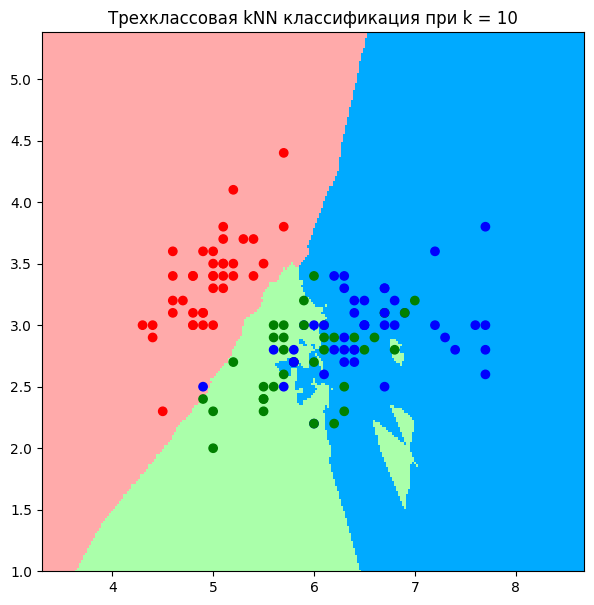

In [19]:
get_graph(X_train, y_train, k)



2.	Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd().

In [20]:
# найдем сингулярное разложение X
S, U, V = np.linalg.svd(X, full_matrices=True, hermitian=False)

In [21]:
S

array([[-0.06161685,  0.12961144,  0.0021386 , ..., -0.09343429,
        -0.09573864, -0.08085465],
       [-0.05807094,  0.11101978,  0.07067239, ...,  0.03690405,
        -0.03153954,  0.01309526],
       [-0.05676305,  0.11796647,  0.00434255, ...,  0.03066199,
         0.19531473,  0.13569909],
       ...,
       [-0.0940593 , -0.0498297 , -0.04144001, ...,  0.98181631,
        -0.02194514, -0.00894446],
       [-0.09488961, -0.05610123, -0.21297821, ..., -0.02155617,
         0.94178018, -0.02971961],
       [-0.08847836, -0.0515697 , -0.09575285, ..., -0.0086052 ,
        -0.03021088,  0.9736599 ]])

In [22]:
# столбцы ортогональной матрицы  U  — собственные векторы матрицы  X*XT
# максимальными сингулярными числами выберем первые два
U

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [23]:
# столбцы ортогональной матрицы  V  — собственные векторы матрицы  XT*X
V

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

In [24]:
# отбросим два столбца матрицы V с соответствующими им минимальными значениями сингулярных чисел  
W = V[:, :2]
W

array([[-0.75110816, -0.38008617],
       [ 0.2841749 ,  0.5467445 ],
       [ 0.50215472, -0.67524332],
       [ 0.32081425, -0.31725607]])

In [25]:
# получим новую матрицу «объекты-признаки», умножив исходную матрицу X на матрицу весов  W
X2 = np.dot(X,W)
X2

array([[-2.06886001, -1.03362559],
       [-2.06072582, -1.2309806 ],
       [-1.90388468, -0.97809013],
       [-1.75676041, -1.12980463],
       [-1.9653317 , -0.94094252],
       [-1.96571322, -1.19497785],
       [-1.68964199, -0.92998256],
       [-1.97195121, -1.11781575],
       [-1.71358923, -1.09561197],
       [-2.01417429, -1.21210488],
       [-2.187142  , -1.10582687],
       [-1.7715141 , -1.10932285],
       [-2.01769643, -1.16124638],
       [-1.79278877, -0.7686303 ],
       [-2.55297921, -0.89126499],
       [-2.14938917, -0.90058278],
       [-2.16657511, -0.92488052],
       [-2.03677858, -1.06535119],
       [-2.25154459, -1.33195254],
       [-1.90131064, -0.96885217],
       [-2.17196353, -1.40489888],
       [-1.8976467 , -1.05525223],
       [-1.86575032, -0.51881072],
       [-1.87880429, -1.4407243 ],
       [-1.62086768, -1.31189584],
       [-2.0354057 , -1.40403788],
       [-1.85757288, -1.2487913 ],
       [-2.09375535, -1.13915853],
       [-2.17238831,

In [26]:
X2_train, X2_test, y_train, y_test = model_selection.train_test_split(X2, y, test_size=0.2, random_state=1)

In [27]:
# работа алгоритма при различных k

k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 1.000


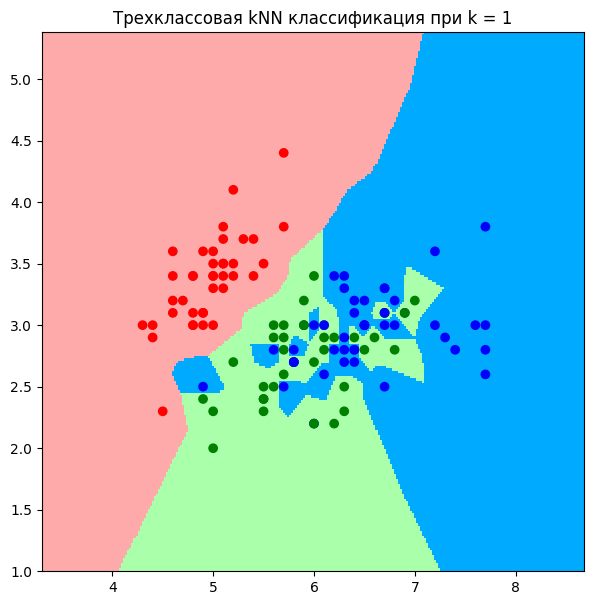

In [28]:
get_graph(X_train, y_train, k)

In [29]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 1.000


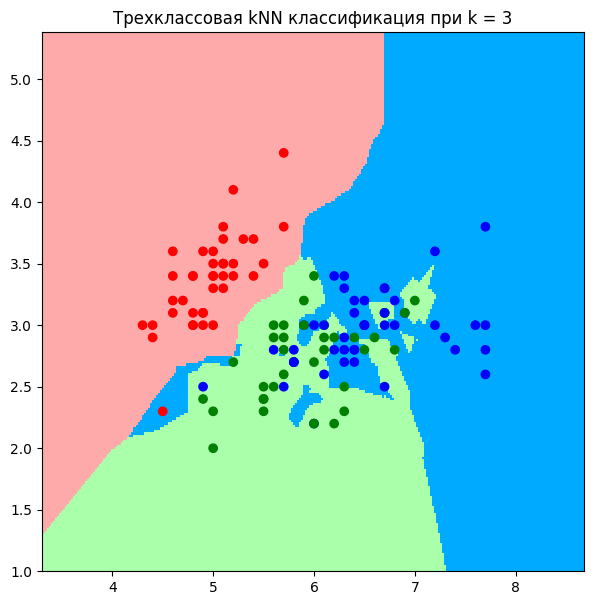

In [30]:
get_graph(X_train, y_train, k)

In [33]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 1.000


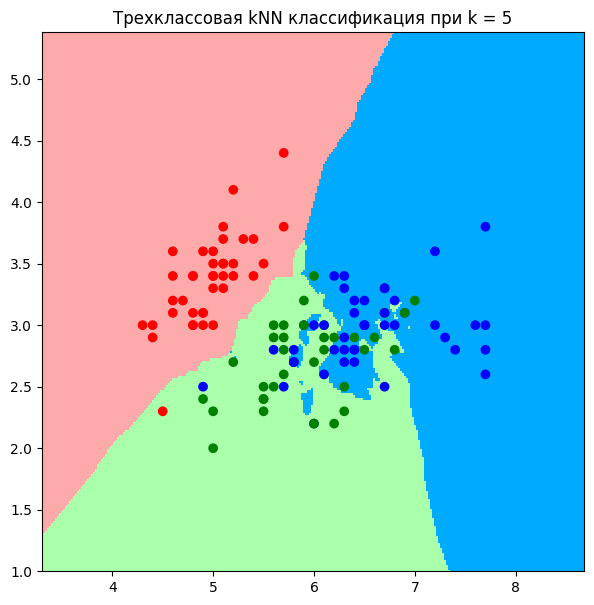

In [34]:
get_graph(X_train, y_train, k)

In [35]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.967


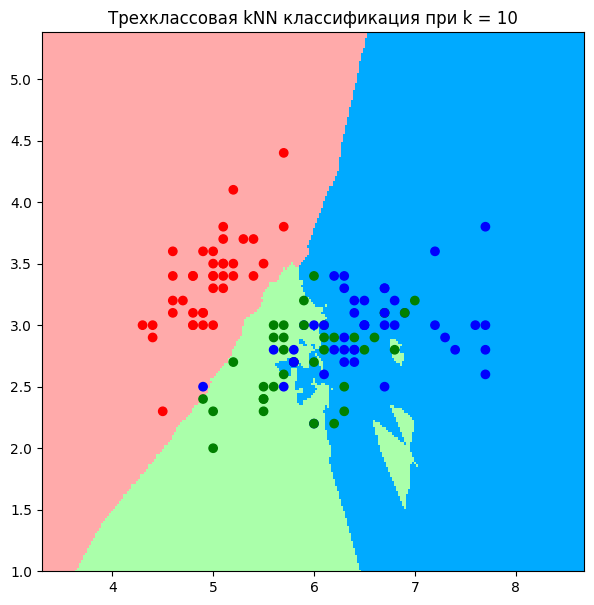

In [36]:
get_graph(X_train, y_train, k)

Вывод: реализация метода главных компонент посредством сингулярного разложения не меняет полученный результат, но позволяет существенно снизить размерность матричных операций, но снижает требования к ресурсам для выполнения вычислений.